# Przestrzenie barw

## RGB

Przestrzeń barw RGB jest opisywana współrzędnymi R (red), G (green), B (blue).
Jest to model wynikający z właściwości odbiorczych ludzkiego oka, w którym wrażenie widzenia dowolnej barwy można wywołać przez zmieszanie w ustalonych proporcjach trzech wiązek światła o barwie czerwonej, zielonej i niebieskiej.

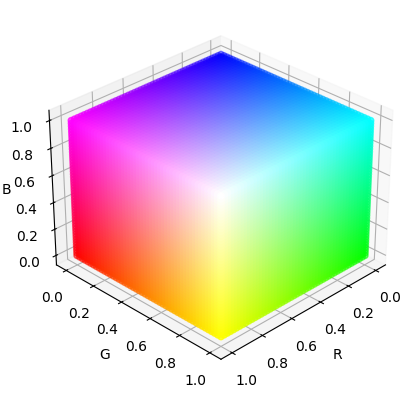

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate RGB values with higher resolution
r = np.linspace(0, 1, 50)
g = np.linspace(0, 1, 50)
b = np.linspace(0, 1, 50)

# Create a meshgrid of RGB values
R, G, B = np.meshgrid(r, g, b)

# Flatten the meshgrid arrays
R = R.flatten()
G = G.flatten()
B = B.flatten()

# Plot the RGB cube
sc = ax.scatter(R, G, B, c=np.stack([R, G, B], axis=1))

# Set labels
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B', labelpad=-2)

# Rotate the plot
ax.view_init(30, 45)

plt.show()

## HSV

### Hue (Odcień):

 > Określa podstawowy kolor (np. czerwony, zielony, niebieski).
 >
 > Reprezentowany jako kąt w kole barw (0°–360°).
 >
 > 0° = czerwony
 >
 > 120° = zielony
 >
 > 240° = niebieski.

### Saturation (Nasycenie):

 > Opisuje intensywność koloru.
 >
 > Wartości w zakresie 0–1 (lub 0–100%):
 >
 > 0 = brak koloru (odcień szarości),
 >
 > 1 = pełna intensywność koloru.

### Value (Wartość):

 > Określa jasność koloru.
 >
 > Wartości w zakresie 0–1 (lub 0–100%):
 >
 > 0 = czarny,
 >
 > 1 = pełna jasność.

 ![hsv](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/1280px-HSV_color_solid_cylinder_saturation_gray.png)


# Konwersja

## RGB - HSV

$$
\begin{align*}
C_{max} &= \max(R, G, B) \\
C_{min} &= \min(R, G, B) \\
\Delta &= C_{max} - C_{min} \\
H &= \begin{cases} 
0 & \text{if } \Delta = 0 \\
60 \times \left( \frac{G - B}{\Delta} \mod 6 \right) & \text{if } C_{max} = R \\
60 \times \left( \frac{B - R}{\Delta} + 2 \right) & \text{if } C_{max} = G \\
60 \times \left( \frac{R - G}{\Delta} + 4 \right) & \text{if } C_{max} = B 
\end{cases} \\
S &= \begin{cases} 
0 & \text{if } C_{max} = 0 \\
\frac{\Delta}{C_{max}} & \text{otherwise}
\end{cases} \\
V &= C_{max}
\end{align*}
$$

## HSV - RGB

$$
\begin{align*}
C &= V \times S \\
X &= C \times (1 - |(H / 60) \mod 2 - 1|) \\
m &= V - C \\
\end{align*}
$$

$$
\begin{cases}
(R', G', B') &= (C, X, 0) & \text{if } 0 \leq H < 60 \\
(R', G', B') &= (X, C, 0) & \text{if } 60 \leq H < 120 \\
(R', G', B') &= (0, C, X) & \text{if } 120 \leq H < 180 \\
(R', G', B') &= (0, X, C) & \text{if } 180 \leq H < 240 \\
(R', G', B') &= (X, 0, C) & \text{if } 240 \leq H < 300 \\
(R', G', B') &= (C, 0, X) & \text{if } 300 \leq H < 360 \\
\end{cases}
$$

$$
\begin{align*}
R &= (R' + m) \times 255 \\
G &= (G' + m) \times 255 \\
B &= (B' + m) \times 255 \\
\end{align*}
$$

In [ ]:
def rgb_to_hsv(r, g, b):
    """
    Convert RGB to HSV.
    
    Parameters:
        r, g, b (int): RGB values (0-255).
    
    Returns:
        tuple: (h, s, v) where h is 0-360, s and v are 0-1.
    """
    # Normalize RGB values
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    
    # Find the maximum and minimum values
    max_val = max(r, g, b)
    min_val = min(r, g, b)
    # Calculate the delta
    delta = max_val - min_val

    # Hue calculation
    if delta == 0:
        h = 0
    elif max_val == r:
        h = 60 * (((g - b) / delta) % 6)
    elif max_val == g:
        h = 60 * (((b - r) / delta) + 2)
    elif max_val == b:
        h = 60 * (((r - g) / delta) + 4)

    # Saturation calculation
    s = 0 if max_val == 0 else delta / max_val

    # Value calculation
    v = max_val

    return h, s, v

def hsv_to_rgb(h, s, v):
    """
    Convert HSV to RGB.
    
    Parameters:
        h (float): Hue (0-360).
        s (float): Saturation (0-1).
        v (float): Value (0-1).
    
    Returns:
        tuple: (r, g, b) RGB values (0-255).
    """
    # Calculate chroma, x (second largest component), and m (minimum component)
    c = v * s
    x = c * (1 - abs((h / 60) % 2 - 1))
    m = v - c

    # Calculate RGB values
    if 0 <= h < 60:
        r_, g_, b_ = c, x, 0
    elif 60 <= h < 120:
        r_, g_, b_ = x, c, 0
    elif 120 <= h < 180:
        r_, g_, b_ = 0, c, x
    elif 180 <= h < 240:
        r_, g_, b_ = 0, x, c
    elif 240 <= h < 300:
        r_, g_, b_ = x, 0, c
    elif 300 <= h < 360:
        r_, g_, b_ = c, 0, x
    else:
        r_, g_, b_ = 0, 0, 0

    r = int((r_ + m) * 255)
    g = int((g_ + m) * 255)
    b = int((b_ + m) * 255)

    return r, g, b


rgb_color = (255, 0, 0)  # Red
hsv_color = rgb_to_hsv(*rgb_color)
print(f"RGB {rgb_color} to HSV {hsv_color}")

rgb_converted_back = hsv_to_rgb(*hsv_color)
print(f"HSV {hsv_color} back to RGB {rgb_converted_back}")


RGB (255, 0, 0) to HSV (0.0, 1.0, 1.0)
HSV (0.0, 1.0, 1.0) back to RGB (255, 0, 0)
